In [1]:
import torch
from torch import nn
import torchaudio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

c:\Users\Anurag Kadam\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_info = pd.read_csv("dataset/training_info.csv")

In [3]:
train_info.head()

,FileName,Class,Duration,SampleRate,Channels
0,1-E1-Major 00.wav,Sound_Guitar,2.5,44100,1
1,1-E1-Major 01.wav,Sound_Guitar,2.5,44100,1
2,1-E1-Major 02.wav,Sound_Guitar,2.5,44100,1
3,1-E1-Major 03.wav,Sound_Guitar,2.5,44100,1
4,1-E1-Major 04.wav,Sound_Guitar,2.5,44100,1


In [135]:
num_points = 44100 * 5
count = 0
list_names = []
temp_set = set()
for idx, row in train_info.iterrows():
    if row["Duration"] >= 5 and row["Channels"] == 1 and row["SampleRate"] == 44100:
        waveform, sr = torchaudio.load(
            "archive/Train_submission/Train_submission/" + row["FileName"]
        )
        lenny = len(waveform[0])
        torchaudio.save(
            f"dataset/TrainWave/5sec_" + row["FileName"],
            waveform[0][None, (lenny - num_points) // 2 : (lenny + num_points) // 2],
            sr,
        )
        if "5sec_" + row["FileName"] not in temp_set:
            list_names.append("5sec_" + row["FileName"])
            temp_set.add("5sec_" + row["FileName"])
        print(count, end="\r")
        count += 1



(['5sec_AR_A_fret_0-20.wav',
  '5sec_AR_A_muted5.wav',
  '5sec_AR_B_fret_0-20.wav',
  '5sec_AR_B_muted5.wav',
  '5sec_AR_DN_III_VIII_XIV.wav',
  '5sec_AR_D_fret_0-20.wav',
  '5sec_AR_D_muted5.wav',
  '5sec_AR_E1_fret_0-20.wav',
  '5sec_AR_E1_muted5.wav',
  '5sec_AR_E_fret_0-20.wav',
  '5sec_AR_E_muted5.wav',
  '5sec_AR_G_fret_0-20.wav',
  '5sec_AR_G_muted5.wav',
  '5sec_AR_G_V_bending.wav',
  '5sec_AR_G_V_slide.wav',
  '5sec_AR_Lick10_FN.wav',
  '5sec_AR_Lick10_KN.wav',
  '5sec_AR_Lick10_MN.wav',
  '5sec_AR_Lick11_FN.wav',
  '5sec_AR_Lick11_KN.wav',
  '5sec_AR_Lick11_MN.wav',
  '5sec_AR_Lick12_FN.wav',
  '5sec_AR_Lick12_KN.wav',
  '5sec_AR_Lick12_MN.wav',
  '5sec_AR_Lick1_FN.wav',
  '5sec_AR_Lick1_FN_Lage.wav',
  '5sec_AR_Lick1_FVSDN.wav',
  '5sec_AR_Lick1_KN.wav',
  '5sec_AR_Lick1_KVSDN.wav',
  '5sec_AR_Lick1_MN.wav',
  '5sec_AR_Lick1_MVSDN.wav',
  '5sec_AR_Lick2_FN.wav',
  '5sec_AR_Lick2_FVSH.wav',
  '5sec_AR_Lick2_KN.wav',
  '5sec_AR_Lick2_KN_Lage.wav',
  '5sec_AR_Lick2_KVSH.wav',
 

In [437]:
dataaa = [[], [], []]


for n, dummy_name in enumerate(list_names):
    # dummy_name = list_names[np.random.randint(1000)]
    # dummy_name = "5sec_LP_Lick6_FHBV.wav"
    waveform, sr = torchaudio.load("dataset/TrainWave/" + dummy_name)
    spectrogram_transform = torchaudio.transforms.Spectrogram(
        n_fft=2048, hop_length=512
    )
    spec = (spectrogram_transform(waveform[0]) + 1e-10).log2()
    # print(spec.shape, 44100*5)
    # plt.imshow((spec + 1e-10).log(), aspect="auto")
    # plt.figure()
    # plt.imshow((spec).log(), aspect="auto")
    # plt.colorbar()
    # print(dummy_name)
    dataaa[0].append(dummy_name)
    dataaa[1].append((spec - spec.min()) / (spec.max() - spec.min()))
    dataaa[2].append(
        train_info[train_info["FileName"] == dummy_name[5:]]["Class"].tolist()[0]
    )
    print(n, end="\r")

In [438]:
# pickle.dump(dataaa, open("dataset/processed_data.pickle", 'wb'))

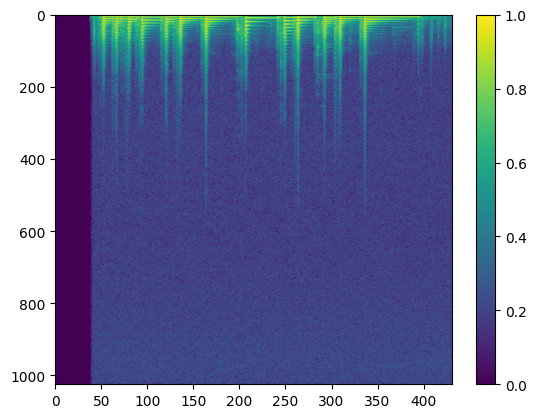

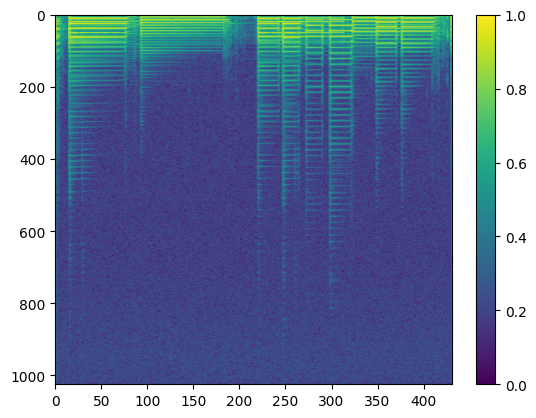

In [439]:
# randi = np.random.randint(100)
randi = 42
plt.imshow(dataaa[1][randi], aspect="auto")
plt.colorbar()

plt.figure()
plt.imshow(dataaa[1][randi+30], aspect="auto")
plt.colorbar()

In [392]:
randi

42

5sec_WaveDrum02_43HH (46).wav


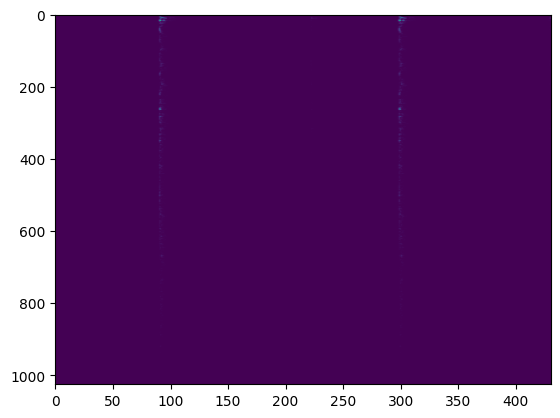

In [303]:
plt.imshow(dataaa[1][794]*100/.18, aspect="auto")
print(dataaa[0][794])